# Inverse Problems Exercises: 2022s s01 (all)
https://www.umm.uni-heidelberg.de/miism/

## Notes
* Please **DO NOT** change the name of the `.ipynb` file. 
* Please **DO NOT** import extra packages to solve the tasks. 
* Please put the `.ipynb` file directly into the `.zip` archive without any intermediate folder. 

## Please provide your personal information
* full name (Name): Maximilian Richter

YOUR ANSWER HERE

## I05: Parabolic trajectory problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Forward problem
Assume that we observe a ball thrown perpendicular to the earth's
surface to the sky. By ignoring friction, we can write the equation of motion
as the height $g$ as a function of time $t$ as 
$$g_i = g(t_i) = f_0 + f_1 t_i + \frac{1}{2} f_2 t_i^2 = \begin{bmatrix} 1 & t_i & \frac{1}{2} t_i^2 \end{bmatrix} \begin{bmatrix} f_0 \\ f_1 \\ f_2 \end{bmatrix} .$$

* Given $f_\text{true} = \begin{bmatrix} f_0 \\ f_1 \\ f_2 \end{bmatrix} = \begin{bmatrix} 1 \\ 25 \\ -4 \end{bmatrix}$
* Given $t_i = (0, 1, ..., 8)$
* Calculate $g_i = g(t_i)$
* Save the output in the variables `f_true`, `t` and `g`, respectivly (as `numpy.array`)
* Plot `g` versus `t` in the axes `ax`

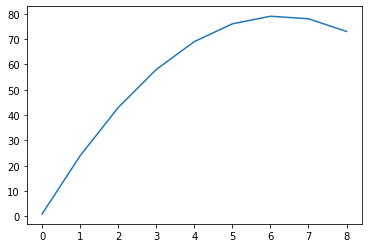

In [31]:
f_true = np.array([1, 25, -4])
g_i = lambda t: np.array([1, t, 0.5*t**2])@f_true
t = np.arange(0,9)
g = np.array([g_i(t_i) for t_i in t])

fig, ax = plt.subplots()  # Create a figure and an axes.

ax.plot(t, g)

In [32]:
# This cell contains hidden tests.



In [33]:
# This cell contains hidden tests.


### Inverse problem
Collecting all measurements, we obtain the system of equations
$$g = \begin{bmatrix} g_1 \\ ... \\ g_n \end{bmatrix}
= \begin{bmatrix} 1 & t_1 & \frac{1}{2} t_1^2 \\ ... & ... & ... \\ 1 & t_n & \frac{1}{2} t_n^2 \end{bmatrix}
\begin{bmatrix} f_0 \\ f_1 \\ f_2 \end{bmatrix}
= A f .$$
When the number of measurements is the same as the number of parameters, $A$ is square. The solution involves the inverse as 
$$\hat{f} = A^{-1} g .$$

* Take the last 3 elements from `t` and `g`
* Calculate $A$ and $\hat{f}$ 
* Save the output in the variables `A` and `f_est`, respectivly (as `numpy.array`)

In [34]:
t_new = t[-3:]
g_new = g[-3:]

A = np.array([[1, t_i, 0.5*t_i**2] for t_i in t_new])
f_est = np.linalg.inv(A)@g_new

In [35]:
# This cell contains hidden tests.


In [36]:
# This cell contains tests.

print(A)
print(f_est)

[[ 1.   6.  18. ]
 [ 1.   7.  24.5]
 [ 1.   8.  32. ]]
[ 1. 25. -4.]


### Optimal approximation
When the number of measurements is larger than the number of parameters, $A$ is generally not invertible. The solution involves the pseudo-inverse as 
$$\hat{f} = (A^T A)^{-1} A^T g = A^{PI} g .$$

* Take all elements from `t` and `g`
* Calculate $A$ and $\hat{f}$ 
* Save the output in the variables `A` and `f_est`, respectivly (as `numpy.array`)

In [37]:
A = np.array([[1, t_i, 0.5*t_i**2] for t_i in t])
f_est = np.linalg.inv(A.T@A)@A.T@g

In [38]:
# This cell contains hidden tests.


In [39]:
# This cell contains tests.

print(A)
print(f_est)

[[ 1.   0.   0. ]
 [ 1.   1.   0.5]
 [ 1.   2.   2. ]
 [ 1.   3.   4.5]
 [ 1.   4.   8. ]
 [ 1.   5.  12.5]
 [ 1.   6.  18. ]
 [ 1.   7.  24.5]
 [ 1.   8.  32. ]]
[ 1. 25. -4.]


### Measurement errors
The real measurements usually contain noise. In the case of additive Gaussian noise, the problem is formulated as
$$g' = g + \epsilon = Af + \epsilon ,$$
where $\epsilon$ is a random variable with Gaussian distribution with mean $0$ and variance $\sigma^2$, i.e. $\epsilon \sim \mathcal{N}(0,\sigma^2)$. The solution involves the pseudo-inverse as 
$$\hat{f} = A^{PI} g' .$$

* Given $\sigma = 2$
* Calculate $g'$ and $\hat{f}$ 
* Save the output in the variables `g_n` and `f_est`, respectivly (as `numpy.array`)
* Plot `g` versus `t` in the axes `ax`
* Plot `g_n` versus `t` in the axes `ax` as well
* Show the legend in the axes `ax`

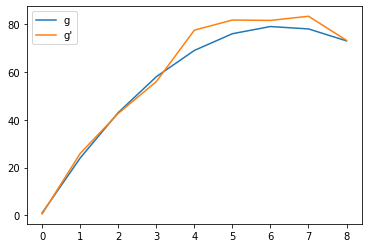

In [44]:
sigma = 2
eps = np.random.normal(0, sigma**2, g.shape[0])
g_n = g + eps
f_est = np.linalg.inv(A.T@A)@A.T@g_n

fig, ax = plt.subplots()  # Create a figure and an axes.

ax.plot(t, g, label="g")
ax.plot(t, g_n, label="g'")
ax.legend()

In [45]:
# This cell contains hidden tests.


In [46]:
# This cell contains hidden tests.


In [47]:
# This cell contains tests.

print(f_est)


[-0.44562911 27.21033588 -4.44287281]
